<img src="https://www.itzem.com/wp-content/uploads/2019/06/Used-Cars.jpg" style="float: left; margin: 20px;height: 350px; width:950px">


# Quality Motors

-------

### Data Analysis and Prediction with Craigslist Used Cars Data



Quality Motors is a medium size of a used car dealer store. To maintain our reputation and expand our clients base (not only from local), we must have a good used cars selection at a good price point to be stand out in the market. Therefore, a good market price prediction will provide a good guidance for sales team. We also can identify some potential good deals from third party such as private party.


How to increase sales revenue by 10% by utilizing market price prediction model to identify good price point in order to generate more online sales in coming six months?
Data Analysis goals:
- Use statistical analysis to identify the used cars selling trend.
- Use visualization to identify the important variables of prediction used car market price
- Create model to prediction the market price



This project uses the [Used Cars Dataset Vehicles listings from Craigslist.org](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

-------


# Dataset

### 1. Introducing the Original Dataset Fields ## 

I've generated a simple table on what each feature can be described and its type from dataset before cleansing.

| Variable Name |  Type   |Description|
| :----------:  | :-----: |:------------:|
|Price|Integer| The Vehicle's listed price in dollars|
|Id|Integer| The Vehicle's unique identification number|
|URL|String| The url of the listing on Craiglist|
|Region|String| Region where the Vehicle locate|
|Region_URL|String| Craiglist's Region URL|
|Year|Float| Vehicle manufacturing year|
|Manufacturer|String| Vehicle manufacturer|
|Model|String| Vehicle model|
|Condition|String| Vehicle condition per seller|
|Cylinders|String| Number of cylinders of the vehicle|
|Fuel|String| Vehicle fuel type|
|Odometer|Float| Mileage of the vehicle when posting the listing|
|Title_Status|String| Status of the vehicle|
|Image_URL|String| URL of the vehicle images|
|Description|String| Details description about the vehicle per seller|
|County|Float| County where the Vehicle locate|
|State|String| State where the vehicle locate|
|Latitude|Float| Latitude where vehicle locate|
|Longitude|Float| Longitude where vehicle locate|

---
There are a total of 539,759 observations and 25 variables including the target variable, `Price`.
 

**Project goal:**
1. Perform cleaning, feature engineering, and EDA necessary.
- Remove any used cars that are older than 30 years old, lacking of pricing information or unrealistic listings from the dataset.
- Visualizing the relationship between Price and all Varibles
- Identify **features** that can predict price.
- Perform prediction model by using OLS and checking the RSqaure.

### 2. Data Loading and Cleansing

In [1]:
# I will need to import all necessary libraries to do the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# identify the path of files
cars =pd.read_csv('C:/Users/hokam/OneDrive/Desktop/Capstone Project2/vehicles.csv')

In [3]:
# get a general idea of the dataset's basic information
cars.shape

(539759, 25)

In [4]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

In [6]:
# I don't need all url links for my analysis, we have unique ID for each row, so vin number is not necessary
# we have column state, so we don't need county, latitude, region and longitude
# repeated information are in description, so I don't need it as well.
cars.drop(columns=['url','image_url','region_url','vin',
                   'county','description','region','model','lat','long'],inplace=True)

In [7]:
# checking missing values 
cars.isnull().sum()

id                   0
price                0
year               987
manufacturer     23584
condition       236052
cylinders       218495
fuel              3393
odometer         98976
title_status      2940
transmission      3973
drive           155772
size            371209
type            147469
paint_color     174239
state                0
dtype: int64

In [8]:
# rename the columns
new_columns_dic ={'id': 'ID','price': 'Price',
                  'year': 'Year','manufacturer': 'Manufacturer',
                  'condition':'Condition','cylinders':'Cyl','fuel': 'Fuel',
                  'odometer': 'Odometer','title_status':'Title_status',
                 'transmission':'Transmission','drive':'Drive',
                 'size':'Size','type':'Type',
                 'paint_color':'Paint_color','state':'State'}
cars.rename(columns=new_columns_dic,inplace=True)

### 3. Removing 0 values rows

In [9]:
# checking if there are some column is non null but the value =0
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

There are 44689 zero values in Price
There are 1 zero values in Year
There are 2376 zero values in Odometer


In [10]:
# For those non null value but there are 0 value, i will assume it as input error, thus, i will drop those
cars = cars.loc[~((cars['Year']==0)| (cars['Price'] ==0)|(cars['Odometer'] ==0))]

In [11]:
# rechecking if there is any 0 value in dataset
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

### 4. Separate Features into Categorical and Numerical Features and Filling the missing Values

#### Categorical and Numerical Features
Let's define a function to separate the features into Categorical and Numerical feature first.

In [12]:
# define a function to separate the feature in order to filling missing value by using looping function.

categorical_feature = []
numerical_feature = []

def check_dtypes(df):
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_feature.append(col)
        else:
            numerical_feature.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_feature, name='Categorical Feature')
    numerical = pd.Series(numerical_feature, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [13]:
check_dtypes(cars)

,Categorical Feature,Numerical Feature
0,Manufacturer,ID
1,Condition,Price
2,Cyl,Year
3,Fuel,Odometer
4,Title_status,NaN
5,Transmission,NaN
6,Drive,NaN
7,Size,NaN
8,Type,NaN
9,Paint_color,NaN


Now, we can fill the missing values per their feature characteristics. I decide to use `median` to fill the missing values under numerical features because our target variable has a lot of outlier, by filling mean in the missing values, it will affect our dataset. In addition, I will use `mode` to fill missing value under categorical features.

#Thanks to https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

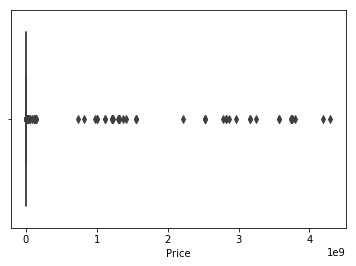

In [14]:
sns.boxplot(cars['Price'])

In [15]:
# filling missing value 
def fill_missing(df, varlist = None , vartype = None ):
    # filling numerical data with median
    if vartype == 'numerical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].median())
    
    # filling categorical data with mode  
    if vartype == 'categorical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].mode().iloc[0])

In [16]:
# filling miss value on the numerical columns with their median
fill_missing(cars, numerical_feature, 'numerical')

In [17]:
# filling miss value on the categorical column with their mode
fill_missing(cars, categorical_feature,'categorical')

In [18]:
cars.isnull().sum()

ID              0
Price           0
Year            0
Manufacturer    0
Condition       0
Cyl             0
Fuel            0
Odometer        0
Title_status    0
Transmission    0
Drive           0
Size            0
Type            0
Paint_color     0
State           0
dtype: int64

In [19]:
# Year and Odometer should not be float, I will change their type to integer
cars['Year'] = cars['Year'].apply(lambda x: int(x))
cars['Odometer'] = cars['Odometer'].apply(lambda x : int(x))

In [20]:
# rechecking 0 values to ensuer nothinng went wrong during filling up the values
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

Let's re-index our rows to identify the change easily in the future.

In [21]:
# re-index rows
cars.reset_index(drop=True, inplace=True)

### 6. Reshape Data to fit our analysis goal

In [22]:
cars.describe()

,ID,Price,Year,Odometer
count,4.936840e+05,4.936840e+05,493684.000000,4.936840e+05
mean,7.087631e+09,2.136132e+05,2009.571848,1.016658e+05
std,5.218418e+06,2.308993e+07,8.793724,1.655230e+05
min,7.065765e+09,1.000000e+00,1900.000000,1.000000e+00
25%,7.084287e+09,5.499000e+03,2006.000000,6.045275e+04
50%,7.088998e+09,1.080000e+04,2011.000000,9.551400e+04
75%,7.092091e+09,1.890000e+04,2015.000000,1.292232e+05
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07


In [23]:
# checking the used cars' year in 2021
cars_2021 = cars[(cars['Year'] == 2021)]

In [79]:
cars_2021.describe()

,ID,Price,Year,Odometer
count,7.200000e+01,72.00000,72.0,7.200000e+01
mean,7.085704e+09,2116.37500,2021.0,3.571528e+05
std,5.854907e+06,3226.96967,0.0,1.067869e+06
min,7.075563e+09,1.00000,2021.0,3.000000e+04
25%,7.079293e+09,650.00000,2021.0,9.551400e+04
50%,7.087440e+09,800.00000,2021.0,9.551400e+04
75%,7.090861e+09,1208.25000,2021.0,9.551400e+04
max,7.093444e+09,14900.00000,2021.0,4.728224e+06


Reshape dataset: `Numerical Features`

1. Price - we can see that price min is 1 which isn't realistic, so I will set the min price of listing to be at least $1000.
- Year - As I can see that from sub setting dataset "cars_2021", the min mileage is 30,000 and it is unlikely to be true, I will drop all those used cars listing whose Year is 2021.
- Age - I will add a column ' Age ' as substitute of Year since we can't use Year as variable to analyze the correlation. Because this dataset is a ongoing dataset which data are scraping from craigslist, so I will calculate the cars ‘age by using the current year (2020) - cars' year. Lastly, vintage cars aren't our market, so we decide to look at the cars between 0~30 years old.
- Odometer - it is unlikely that mileage will over 1,000,000. We are more interested in the mileage that is under 500,000 which will still maintain their resell value depend on the brand and other factors.



In [25]:
print(cars['Odometer'].std())
print(cars['Odometer'].min())
print(cars['Odometer'].max())

165523.01154386075
1
64809218


In [26]:
#set the min price of listing to be at least $1000
cars = cars[cars['Price']. between(999.99,39000)]

# Removing cars is made 2021. Total 72 columns
cars = cars[cars['Year'] <=2020] 

# Removing cars have mileage equal or greater than 500000
cars = cars[cars['Odometer'] <=500000]

# Adding 'Age' column 
cars["Age"] = cars.Year.apply(lambda x: int(2020-x))
cars = cars[(cars.Age >= 0) & (cars.Age <= 30)]


Reshape dataset: `Categorical Features`

1. Title status - If we are going to buy back used cars from Cariglist or we sell used cars to customers, unlikely we will sell or buy back any cars that have salvage title because of high repair cost and least chance to resell them, so I decide to drop them. Aslo, We are not interested in auto parts, so I will drop these rows which have titles as 'parts only'.
- We see there are some salvage under Condition, but we will keep those since those need experts to evaluate vehicles's actual condtion

In [27]:
for i in categorical_feature:
    print(cars[i].unique())

['acura' 'jaguar' 'honda' 'kia' 'chevrolet' 'bmw' 'toyota' 'nissan'
 'volkswagen' 'ford' 'gmc' 'subaru' 'ram' 'lexus' 'volvo' 'dodge' 'buick'
 'jeep' 'hyundai' 'mercedes-benz' 'cadillac' 'audi' 'infiniti' 'pontiac'
 'mini' 'chrysler' 'mazda' 'mercury' 'fiat' 'harley-davidson' 'lincoln'
 'saturn' 'mitsubishi' 'rover' 'tesla' 'alfa-romeo' 'aston-martin'
 'land rover' 'porche']
['excellent' 'good' 'fair' 'like new' 'salvage' 'new']
['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '3 cylinders'
 '10 cylinders' 'other' '12 cylinders']
['gas' 'diesel' 'hybrid' 'other' 'electric']
['clean' 'salvage' 'rebuilt' 'lien' 'parts only' 'missing']
['automatic' 'manual' 'other']
['4wd' 'fwd' 'rwd']
['full-size' 'compact' 'mid-size' 'sub-compact']
['other' 'sedan' 'SUV' 'wagon' 'convertible' 'pickup' 'hatchback' 'truck'
 'coupe' 'offroad' 'van' 'mini-van' 'bus']
['blue' 'orange' 'white' 'black' 'silver' 'red' 'grey' 'green' 'custom'
 'brown' 'yellow' 'purple']
['nc' 'co' 'ny' 'nj' 'va' 'tn' 'il

In [28]:
indexNames = cars[cars['Title_status'] == 'parts only'].index
cars.drop(indexNames, inplace=True)

indexNames1 = cars[cars['Title_status'] == 'salvage'].index
cars.drop(indexNames1, inplace=True)

indexNames2 = cars[cars['Manufacturer'] == 'harley-davidson'].index
cars.drop(indexNames2, inplace=True)

In [29]:
cars.shape

(445354, 16)

94,405 rows have been removed from the dataset. We now have 445,354 observations and 16 Columns.

### 7. Reclassify columns: State, Manufacturer and Color

We are planning to generate a dummy variables for the presence of the feature, thus, I will classify state, manufacturer and color into different categories since they have the most of unique value in its field, so it will be easier to for analysis their relationship with Price in the future by classifying them.

In [30]:
# add a column to classify states in to different part of USA
# thanks to https://www.path2usa.com/us-map-with-states-and-their-abbreviations
# thanks to https://stackoverflow.com/questions/52529293/how-to-reclassify-pandas-dataframe-column
def clean_state(row):
    Northeast = ['me','vt','nh','ma','ri','ct','nj','de','md','pa','ny']
    West = ['wa','or','id','ut','nv','ca','ak','hi']       
    South = ['wv','va','nc','sc','ga','fl','al','ms','la','ar','tn','ky']
    Midwest = ['mn','wi','mi','oh','in','il','mo','ia']
    Southwest = ['az','nm','tx','ok','dc']
    Central = ['mt','wy','co','nd','sd','ne','ks']
    
    if row.State in Northeast:
        return 'Northeast'   
    if row.State in West:
        return 'West'
    if row.State in South:
        return 'South'   
    if row.State in Midwest:
        return 'Midwest'  
    if row.State in Southwest:
        return 'Southwest'   
    if row.State in Central:
        return 'Central'  
    return row.State

cars['State_Classify'] = cars.apply(clean_state,axis=1)

In [31]:
# add a column to classify Manufacturer into Luxury and Regular cars
def clean_manufacturer(row):
    
    Luxury_cars = ['jaguar','bmw','lexus','mercedes-benz','cadillac','audi','tesla',
                   'alfa-romeo', 'aston-martin','land rover', 'rover','porche','ferrari']
    Mid_tier_cars = ['acura', 'volvo','infiniti','mini','jeep']
    Regular_cars = ['honda', 'kia', 'chevrolet', 'toyota','nissan','ford', 'volkswagen',
                    'gmc', 'subaru', 'ram', 'dodge', 'buick', 'hyundai', 'pontiac', 'chrysler',
                    'mazda', 'lincoln', 'mercury', 'fiat','saturn','mitsubishi', 'datsun']       
    
    if row.Manufacturer in Luxury_cars:
        return 'Luxury_cars'   
    if row.Manufacturer in Mid_tier_cars:
        return 'Mid_tier_cars'
    if row.Manufacturer in Regular_cars:
        return 'Regular_cars'

    return row.Manufacturer

cars['Brand_Classify'] = cars.apply(clean_manufacturer,axis=1)

In [32]:
cars.Paint_color.unique()

array(['blue', 'orange', 'white', 'black', 'silver', 'red', 'grey',
       'green', 'custom', 'brown', 'yellow', 'purple'], dtype=object)

In [33]:
# add a column to classify Paint color into Standard, Special and Custom Color
def clean_color(row):
    Standard_color = ['white', 'black', 'silver', 'red', 'grey']    
    Special_color =  ['blue', 'orange','green','brown', 'yellow', 'purple'] 
    Custom_color = ['custom']
    
    if row.Paint_color in Standard_color:
        return 'Standard_color'   
    if row.Paint_color in Special_color:
        return 'Special_color'
    if row.Paint_color in Custom_color:
        return 'Custom_color'  

cars['Color_Classify'] = cars.apply(clean_color,axis=1)

In [34]:
pd.crosstab(cars.Paint_color,cars.Color_Classify)

Color_Classify,Custom_color,Special_color,Standard_color
Paint_color,,,
black,0,0,61510
blue,0,31250,0
brown,0,6958,0
custom,7546,0,0
green,0,8045,0
grey,0,0,29884
orange,0,1895,0
purple,0,750,0
red,0,0,30433


# Removing Outliers by IQR 

We can see the Odometer has the negative relationship with Price which makes sense that lower mileage will have higher resell price. 

Now, let's remove outliers by using IQR method.

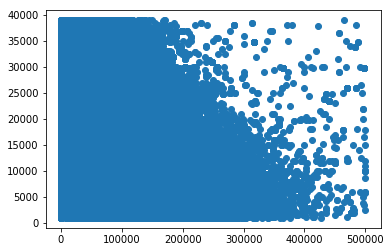

In [35]:
plt.scatter(cars['Odometer'], cars['Price']);

In [36]:
Q1 = cars[['Price','Odometer']].quantile(0.25); print(Q1)
Q3 = cars[['Price','Odometer']].quantile(0.75); print(Q3)
IQR = Q3-Q1;print(IQR)

Price        5900.00
Odometer    63754.25
Name: 0.25, dtype: float64
Price        17999.0
Odometer    132200.0
Name: 0.75, dtype: float64
Price       12099.00
Odometer    68445.75
dtype: float64


In [37]:
#remove  outlier which are 1.5 *IQR
lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)
cars_true = cars[~((cars[['Price','Odometer']] < lower_bound) |(cars[['Price','Odometer']] > upper_bound)).any(axis=1)]

In [38]:
cars_true.shape

(431606, 19)

In [39]:
print(lower_bound)
print(upper_bound)

Price      -12248.500
Odometer   -38914.375
dtype: float64
Price        36147.500
Odometer    234868.625
dtype: float64


In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445354 entries, 0 to 493683
Data columns (total 19 columns):
ID                445354 non-null int64
Price             445354 non-null int64
Year              445354 non-null int64
Manufacturer      445354 non-null object
Condition         445354 non-null object
Cyl               445354 non-null object
Fuel              445354 non-null object
Odometer          445354 non-null int64
Title_status      445354 non-null object
Transmission      445354 non-null object
Drive             445354 non-null object
Size              445354 non-null object
Type              445354 non-null object
Paint_color       445354 non-null object
State             445354 non-null object
Age               445354 non-null int64
State_Classify    445354 non-null object
Brand_Classify    445354 non-null object
Color_Classify    445354 non-null object
dtypes: int64(5), object(14)
memory usage: 68.0+ MB


In [41]:
cars_true.reset_index(drop=True, inplace=True)

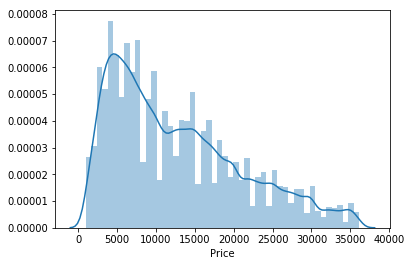

In [42]:
sns.distplot(cars_true['Price'])

# Data Visualization 

### A. Numerical Featuers 
### - Odometer   

In [43]:
cars_true['Price'].describe()

count    431606.000000
mean      12717.985832
std        8396.036055
min        1000.000000
25%        5900.000000
50%       10900.000000
75%       17995.000000
max       36130.000000
Name: Price, dtype: float64

In [44]:
def clean_price(dl):
    if 1000 < dl <= 10000: return 'Price: 1,000 - 10,000'
    elif 10000 < dl <= 20000: return 'Price: 10,0001 - 20,000'
    elif 20000 < dl <= 30000: return 'Pricce:20,001 - 30,000 '
    else: return 'Price Above 30K'

cars_true["Price_Classify"] = cars_true['Price'].map(clean_price)

<Figure size 3240x360 with 0 Axes>

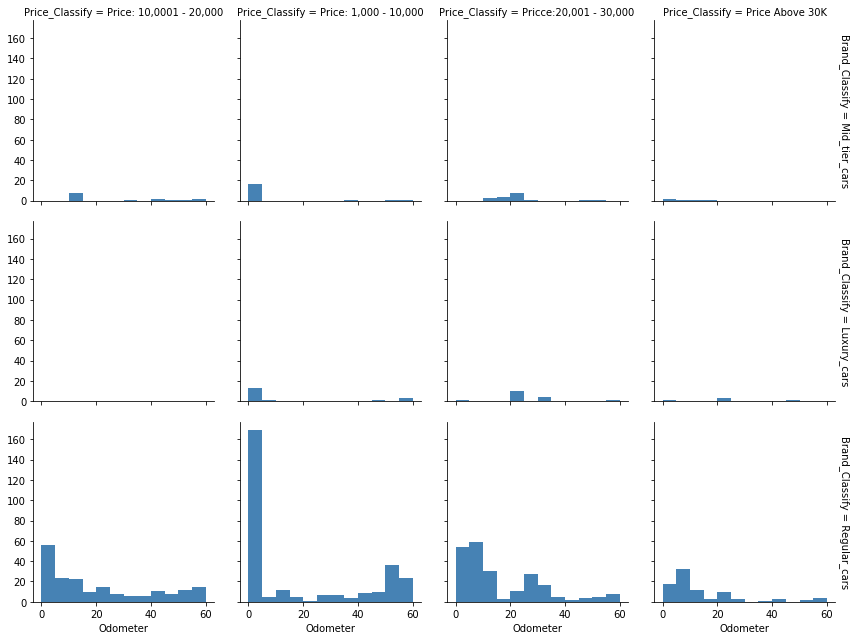

In [45]:
plt.figure(figsize=(45,5))
g = sns.FacetGrid(cars_true, row="Brand_Classify", col="Price_Classify", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Odometer", color="steelblue", bins=bins);

#### **`Insight`**

`Odometer`

1. Regular cars has the greatest number of listings.
-  Used cars under between $1,000 to $10,000 has quiet extreme distributions at both ends (more number of listings falls at the lowest range or highest range. 
-  Majority of used cars have less than 20K mileage.  

### - Age vs Price

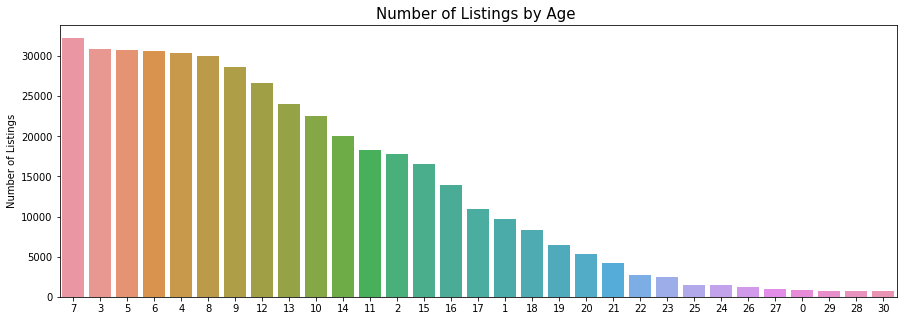

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true.Age,order=cars_true['Age'].value_counts().index)
plt.ylabel ('Number of Listings')
plt.axes().xaxis.label.set_visible(False)
plt.title("Number of Listings by Age ", fontsize = 15);

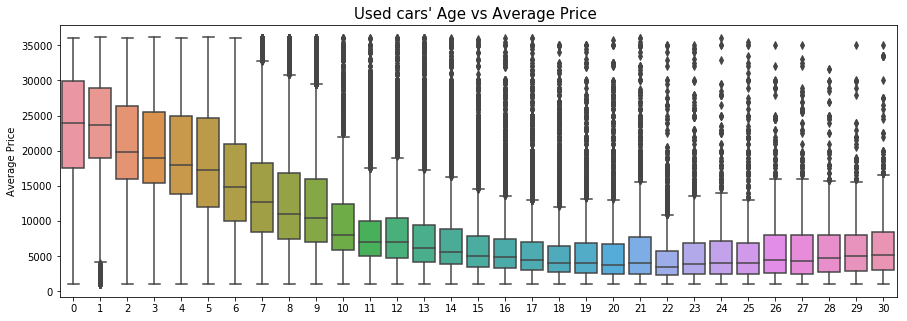

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Age'],cars_true['Price']);
plt.ylabel ('Average Price')
plt.axes().xaxis.label.set_visible(False)
plt.title("Used cars' Age vs Average Price ", fontsize = 15);

#### **`Insight`**

`Odometer`

1. The first plot states that we can find used cars which are 3-7 years old have the greatest number of listings in the market. 
2. We also discovered that cars are under 10 years old have way higher average resold price than those older than 10 years old. But we also can see there are some outliers present in those older used cars. I will assume that those cars might have other factors to boost up their resell price such as brand, low mileage and their condition.

### B. Categorical Featuers vs Price 

### - Cars Mechanic Characteristics ( Cylender, Fuel, Transmission, Drive, Size and Type)

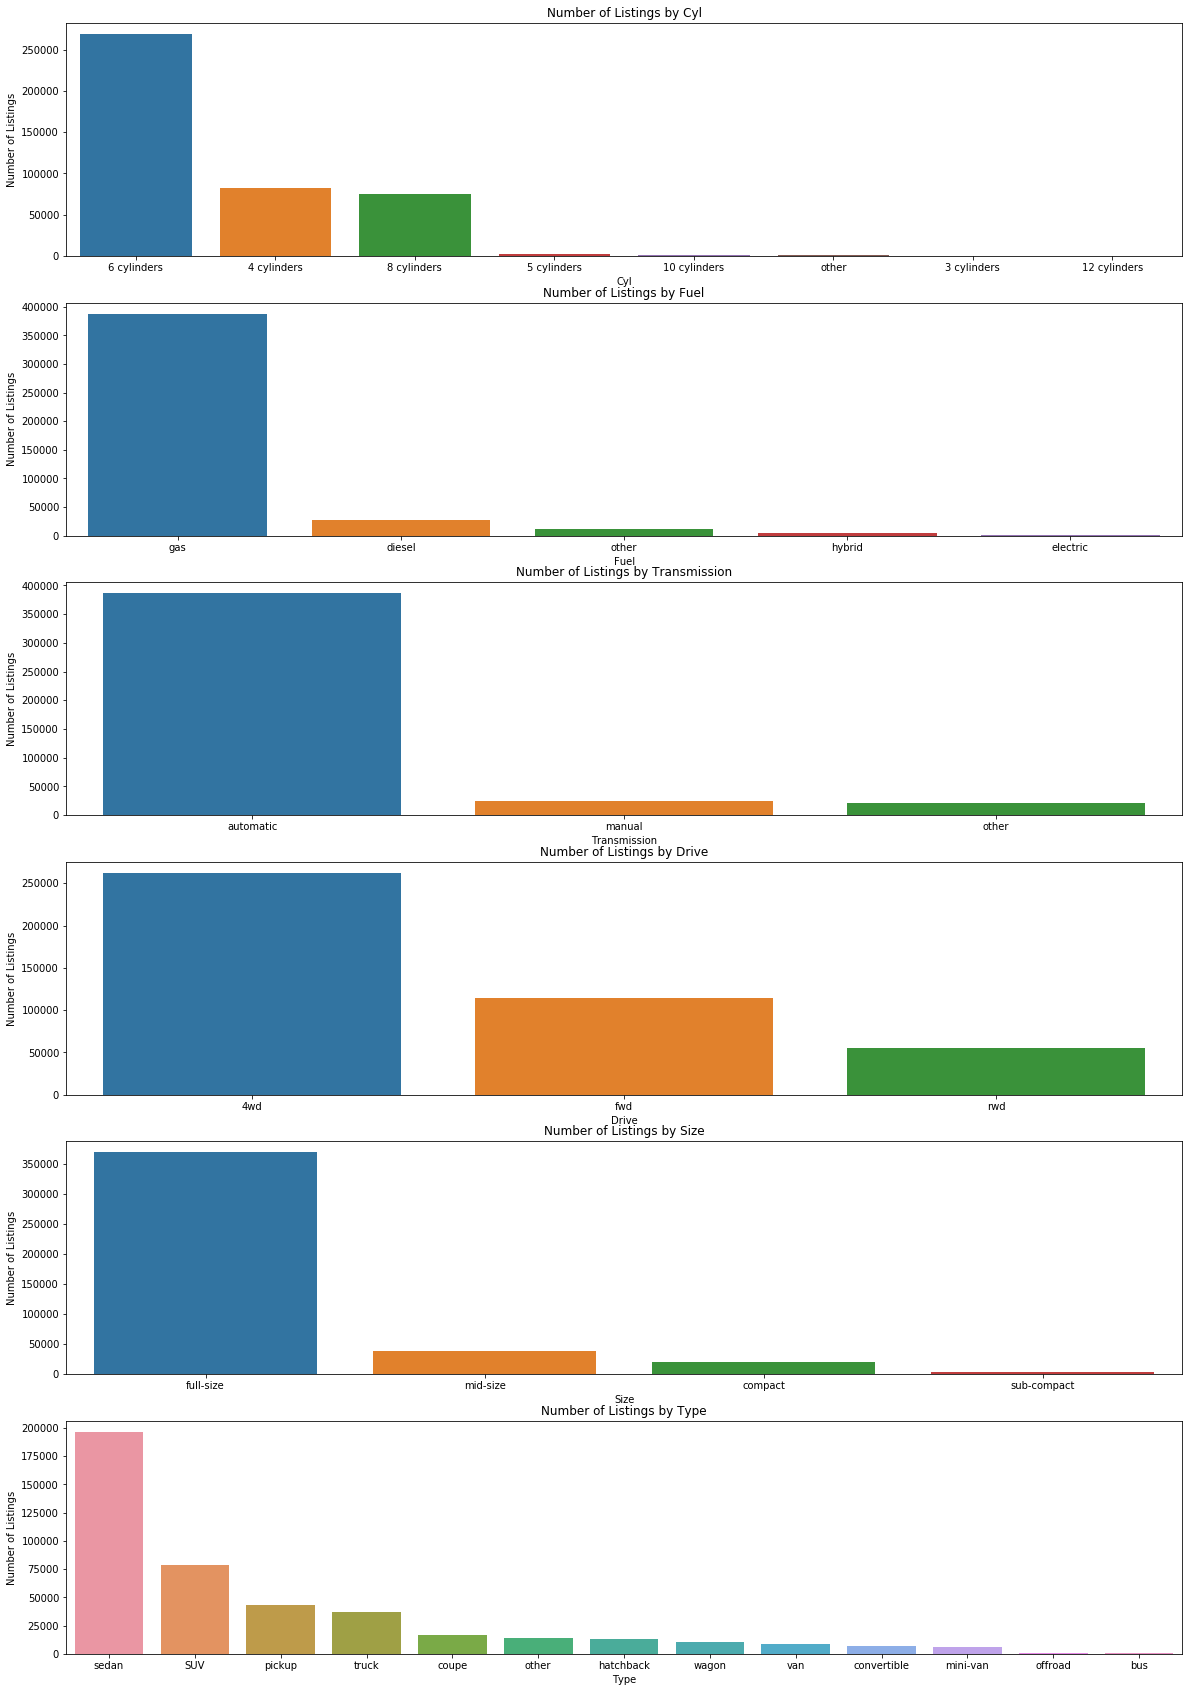

In [48]:
car_mechanic_features =['Cyl','Fuel','Transmission','Drive','Size','Type']

f=plt.figure(figsize=(20,30))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
    plt.ylabel ('Number of Listings')
    plt.title('Number of Listings by ' + str(i))

plt.show()

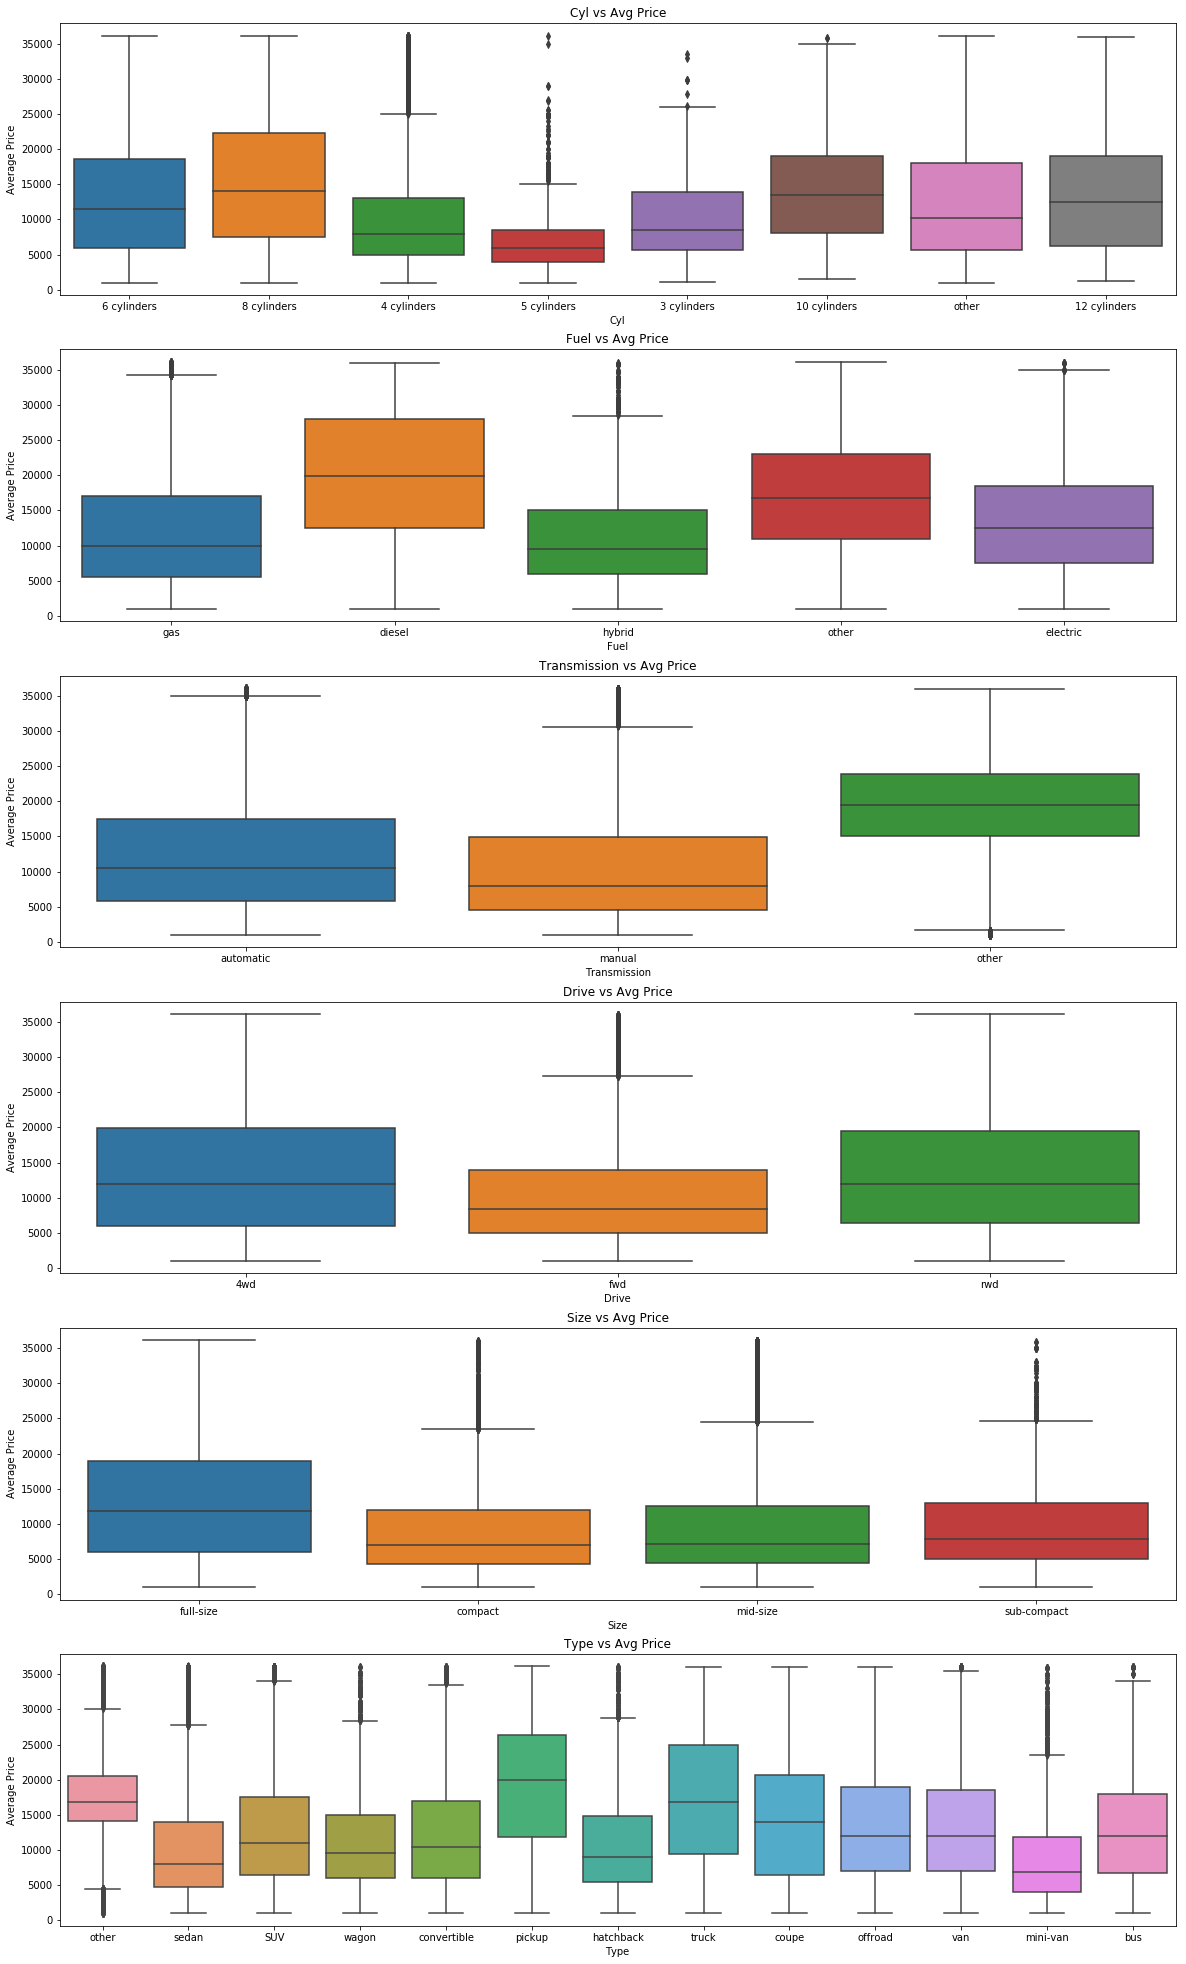

In [49]:
f=plt.figure(figsize=(20,35))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1
    plt.ylabel ('Average Price')
    plt.title(str(i) +' vs Avg Price')
plt.show();

#### **`Insight`**

`Cylender, Fuel, Transmission, Drive, Size and Type`

1. The features have the most listing numbers: 6 Cylinders, Gas Fuel, Automatic Transmission, 4 Wheel Drive, Full Size cars and Sedan Type. 
- For Cylinder, we can see a trend that a greater number of cylinders, the higher median price they have. From business standpoint, I would suggest to sell/buy back any used cars that have 4 or 6 cylinders which would fit different markets: Fuel Efficiency (4 Cylinders) or more horsepower (6 Cylinders). In addition, their price range is at mid tiered. 
- For Fuel type, intuitively we believe that gas and electric cars will have higher median price. However, from the dataset, we see that diesel cars have the higher median price, it may relate to the number of listing on Craigslist compare to other type of cars.
- Pickup has the third place in term of the number of listings, but it does have the highest median price among all car types. And minivan has the lowest median price. I believe that because SUV can be a substitute of minivan.

### - Cars Type_Size

In [50]:
cars_true['Type_size'] =cars_true[['Type', 'Size']].agg('-'.join, axis=1)

In [51]:
cars_true_type = cars_true.copy() 

In [52]:
cars_true_type.sort_values(by='Type_size', inplace=True)

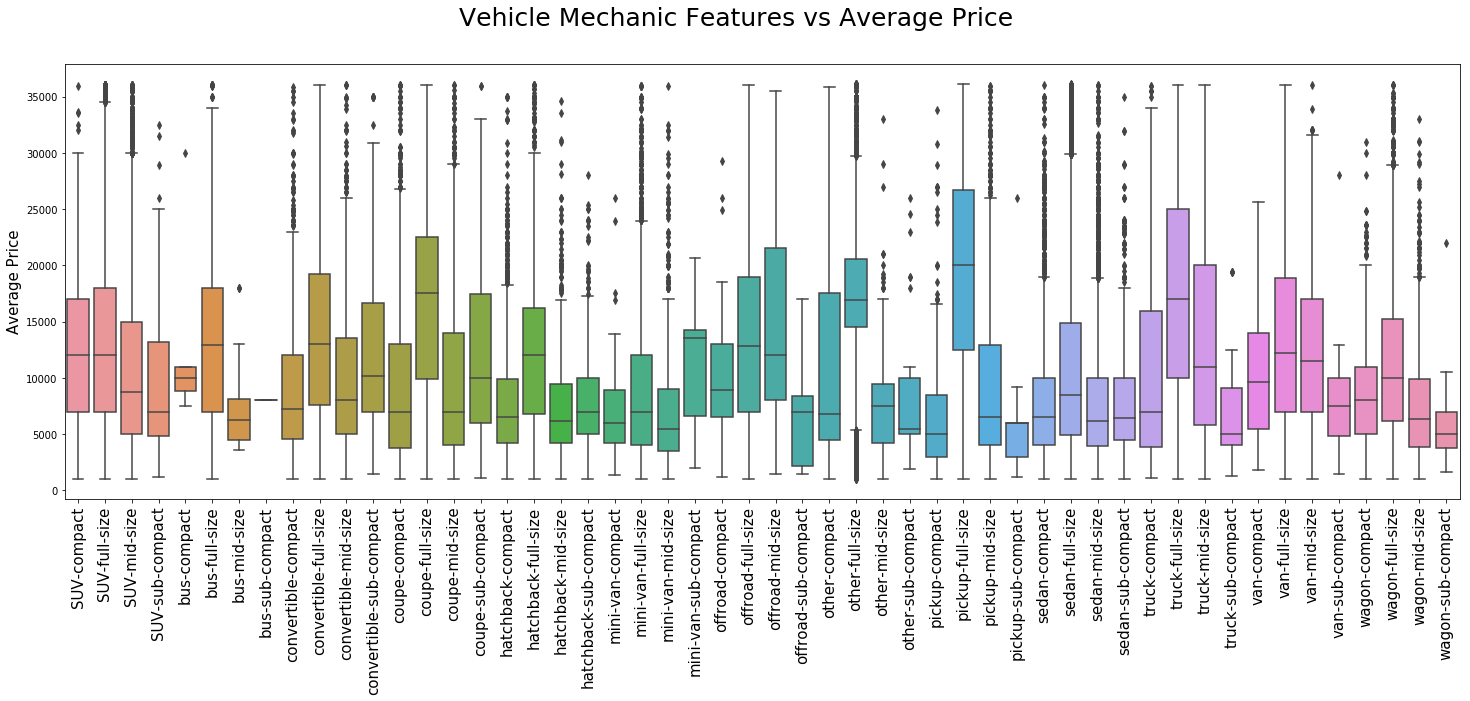

In [53]:
plt.figure(figsize=(25,8))
sns.boxplot(cars_true_type['Type_size'],cars_true_type['Price'])
plt.axes().xaxis.label.set_visible(False)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel ('Average Price', fontsize=15)
plt.suptitle("Vehicle Mechanic Features vs Average Price ", fontsize = 25);

#### **`Insight`**

`Type_Size`

Pickup-Full-size has the highest average price, the next one is Truck-Full-size. One of the reasons can be these types of cars can serve different purposes. For example, Pickup-Full-size can be either family cars or works for certain group of customers like someone in constructions business. Therefore, these types of cars can be priced at a higher price.


### - Car Status (Condition, Title Status) and Appearance (Body Color) 

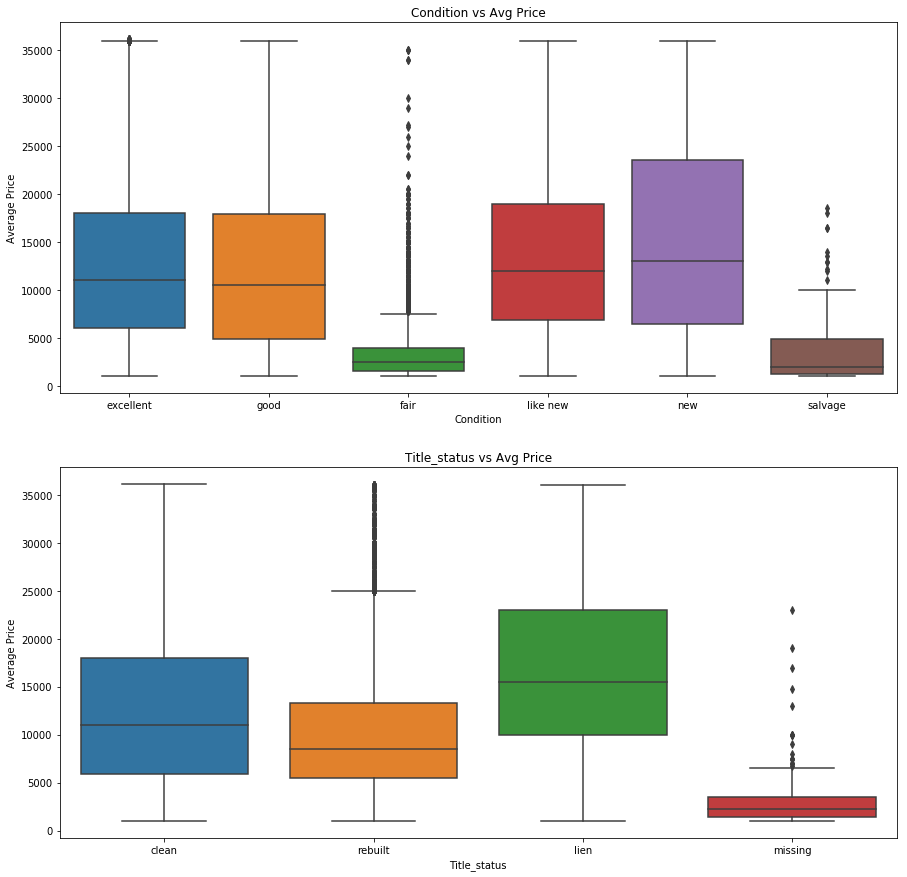

In [54]:
cars_status = ['Condition', 'Title_status']
f=plt.figure(figsize=(15,15))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1
    plt.ylabel ('Average Price')
    plt.title(str(i) +' vs Avg Price')

plt.show()

#### **`Insight`**

`Condition, Title Status`

1.	The graph above displays the frequency distributions for vehicles in the dataset of a certain condition. For persons more concerned about the condition of their vehicles, they will be more likely to consider a better condition one, that is why used cars in new or excellent condition with clean or lien title status would have higher resold power.
2.	The graph above shows the mean price for each condition. New vehicles have an average sales price around 14,000, followed by vehicles which are like new. From client’s standpoint, if they are looking for cheaper alternatives should look at vehicles with excellent to good condition, as they will on average have to spend couple thousand less on a vehicle. Vehicles with a fair condition are most likely severely depreciated, the price is greatly lower than good condition one by 8,000. Therefore, we don't suggest to buy back any car with fair to salvage condition.


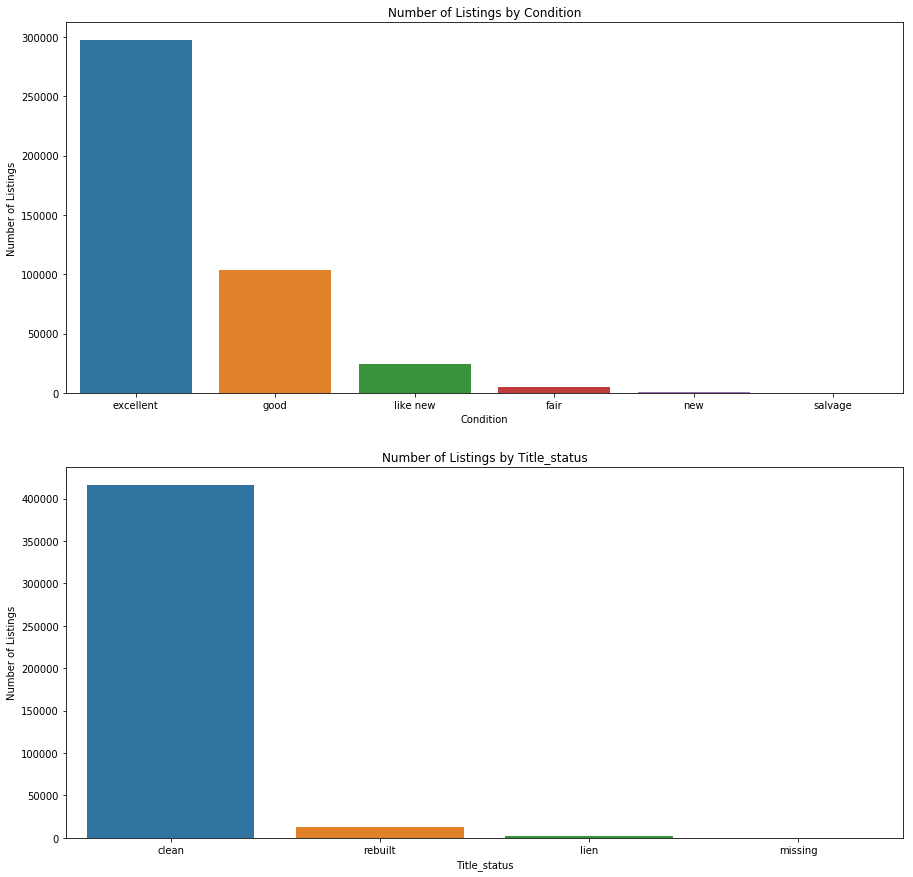

In [55]:
f=plt.figure(figsize=(15,15))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
    plt.ylabel ('Number of Listings')
    plt.title('Number of Listings by ' + str(i))

plt.show()

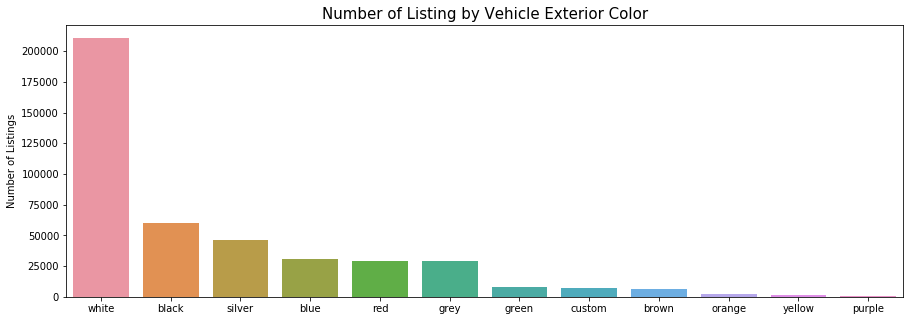

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['Paint_color'],order=cars_true['Paint_color'].value_counts().index)
plt.title('Number of Listing by Vehicle Exterior Color', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.ylabel ('Number of Listings')
plt.show()

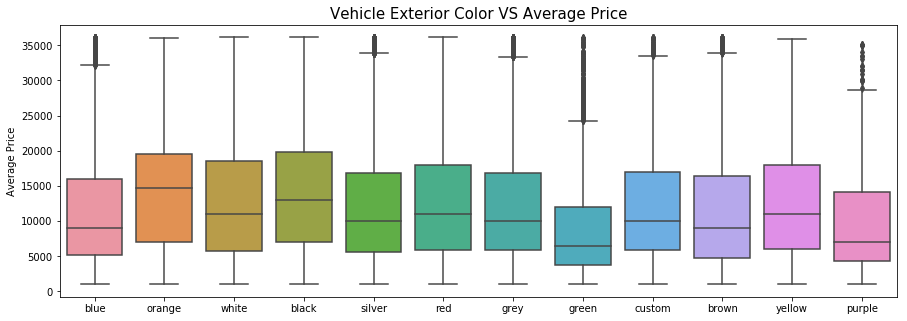

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Paint_color'],cars_true['Price'])
plt.title('Vehicle Exterior Color VS Average Price', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.ylabel ('Average Price')
plt.show()

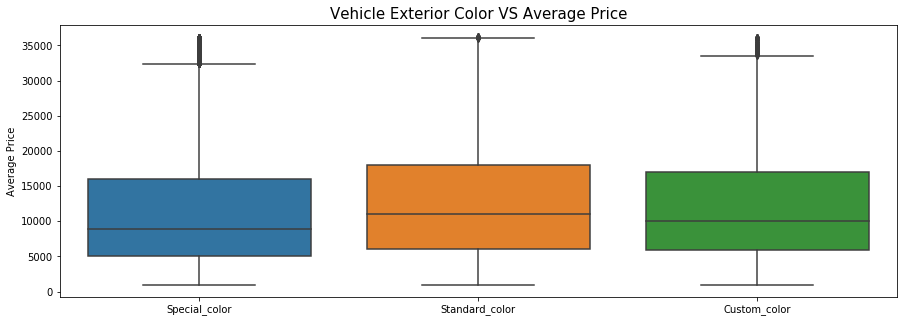

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Color_Classify'],cars_true['Price'])
plt.title('Vehicle Exterior Color VS Average Price', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.ylabel ('Average Price')
plt.show()

#### **`Insight`**

`Color`

Orange cars have the highest Average price because most of fancy sports cars'color is orange. That explains why orange cars have higher average price. Let's look at other colors which are black, white and red, these are standard color, so it makes sense that they are the next one who have higher average price. 

### - Location

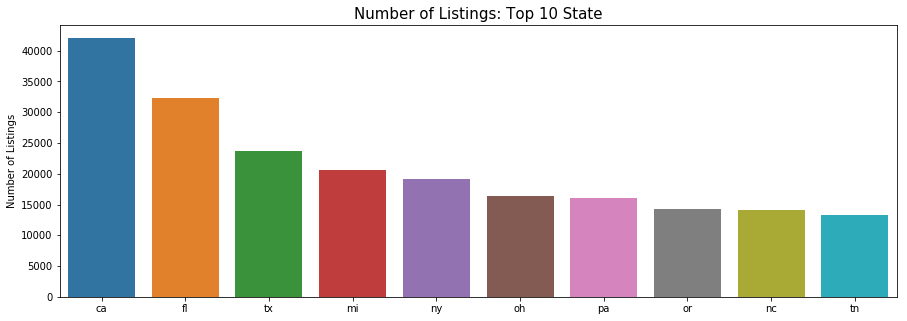

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['State'],order=cars_true['State'].value_counts().iloc[:10].index)
plt.title('Number of Listings: Top 10 State', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.ylabel ('Number of Listings')
plt.show()


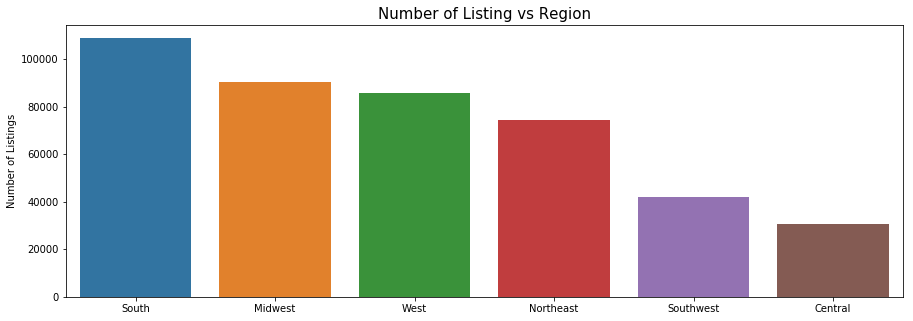

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['State_Classify'],order=cars_true['State_Classify'].value_counts().index)
plt.title('Number of Listing vs Region', fontsize=15)
plt.ylabel ('Number of Listings')
plt.axes().xaxis.label.set_visible(False)
plt.show()

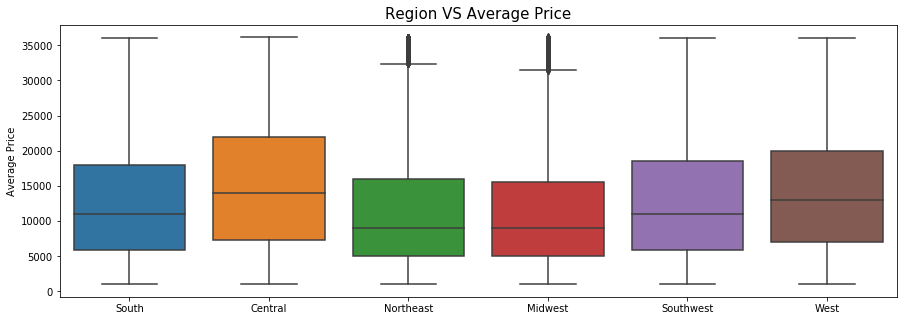

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['State_Classify'],cars_true['Price'])
plt.title('Region VS Average Price', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.ylabel ('Average Price')
plt.show()

#### **`Insight`**

`Location`

1. The states have more population will have more used car to purchase. For example, California, with a population of pproximately 34 million, will generally have more vehicles available for purchase than other states. 
- Region near coast also have more number of listings compare to the Central region.
- We can target our buy back markets from Northeast and Midwest regions since they have lowerest average price.

### - Car Make VS Price

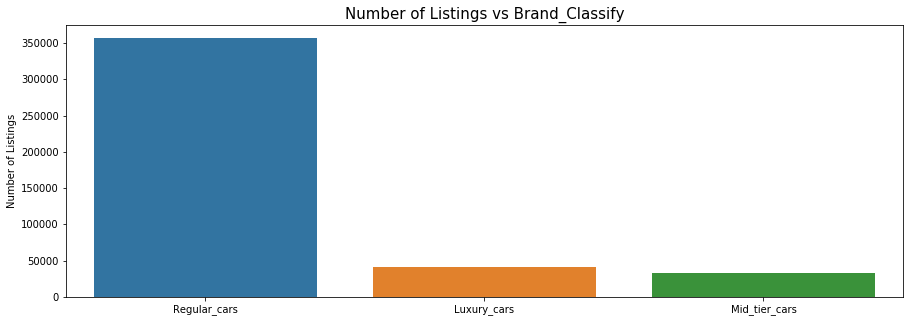

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['Brand_Classify'],order=cars_true['Brand_Classify'].value_counts().index)
plt.title('Number of Listings vs Brand_Classify', fontsize=15)
plt.ylabel ('Number of Listings')
plt.axes().xaxis.label.set_visible(False)

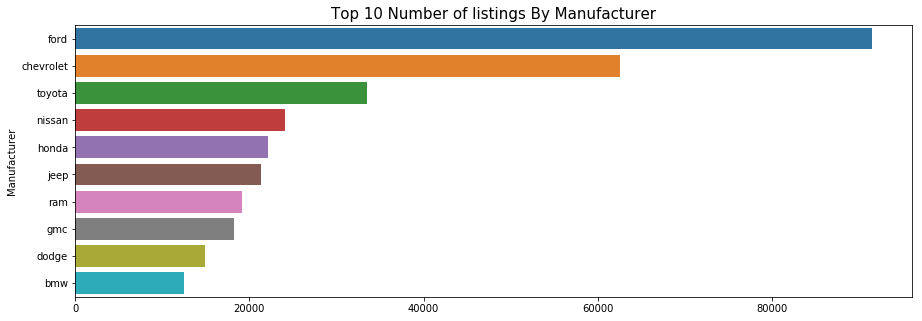

In [63]:
plt.figure(figsize=(15,5))
sns.countplot(y=cars_true['Manufacturer'],order=cars_true['Manufacturer'].value_counts().head(10).index)
plt.title('Top 10 Number of listings By Manufacturer', fontsize=15)
plt.axes().xaxis.label.set_visible(False)
plt.show()

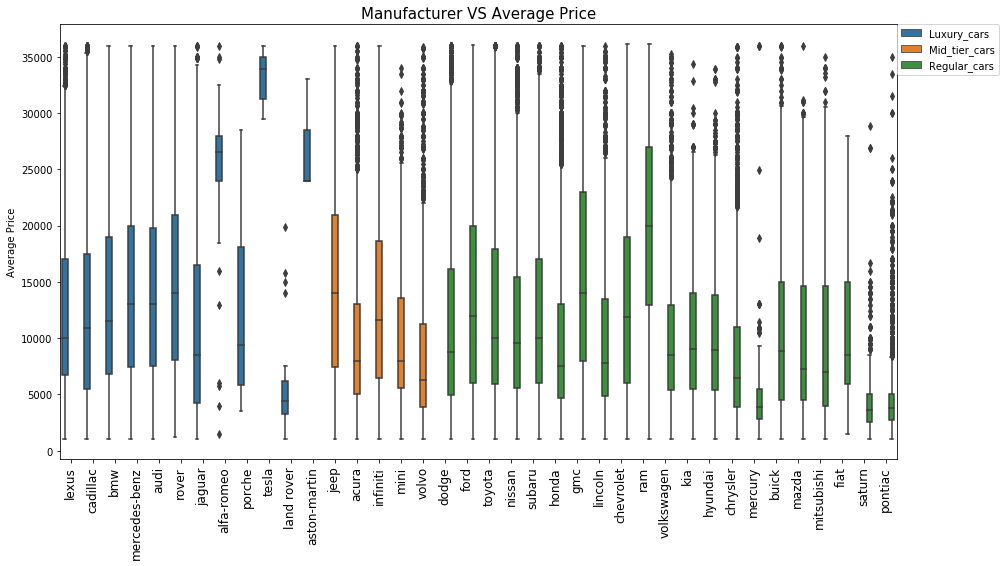

In [64]:
cars_true_brand = cars_true.copy() 
cars_true_brand.sort_values(by='Brand_Classify', inplace=True)
plt.figure(figsize=(15,8))
sns.boxplot(x = cars_true_brand['Manufacturer'],y = cars_true_brand['Price'], hue='Brand_Classify', data=cars_true_brand)
plt.xticks(fontsize=12, rotation=90)
plt.title('Manufacturer VS Average Price', fontsize=15)
plt.ylabel ('Average Price')
plt.axes().xaxis.label.set_visible(False)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

#### **`Insight`**

`Brand Classify`

1.	Regular cars have the greatest number of listings compare to Mid_tier cars and Luxury cars.
- American brand cars have the most number of listings then foreign makes espeically Japanese brand.
- American brand cars have the highest average price among all three difference tiers such as RAM has the highest average price among Regular cars; Jeep has the highest average price among Mid_tier cars and Tesla has the highest average price among Luxury cars.


## Get Dummy Variables

#### From different charts we plots, we do believe all of them are having strong relationship with Price, thus, I will dummy all categorical features. I will use State_Classify, Brand_Classify and Color_classify substitute of State, Manufacturing and Color.

In [65]:
dummy_features = ['Condition','Cyl','Fuel',
                  'Title_status','Transmission', 'Drive',
                  'Size','Type','State_Classify','Brand_Classify','Color_Classify' ]

In [66]:
dummies=pd.get_dummies(cars_true[dummy_features],drop_first=True)

In [67]:
df_corr = dummies.copy()
df_corr['Age'] = cars_true['Age'].values
df_corr['Odometer'] = cars_true['Odometer'].values
df_corr['Price'] = cars_true['Price'].values



In [68]:
corr = df_corr.corr()
corr.drop('Price', inplace=True)


In [69]:
corr['Price'].sort_values(ascending=False).head(10)

Type_pickup                      0.254170
Transmission_other               0.176225
Size_full-size                   0.174556
Type_truck                       0.162710
Cyl_8 cylinders                  0.141402
State_Classify_West              0.104382
Fuel_other                       0.091458
Type_other                       0.090659
Color_Classify_Standard_color    0.066660
Cyl_6 cylinders                  0.049509
Name: Price, dtype: float64

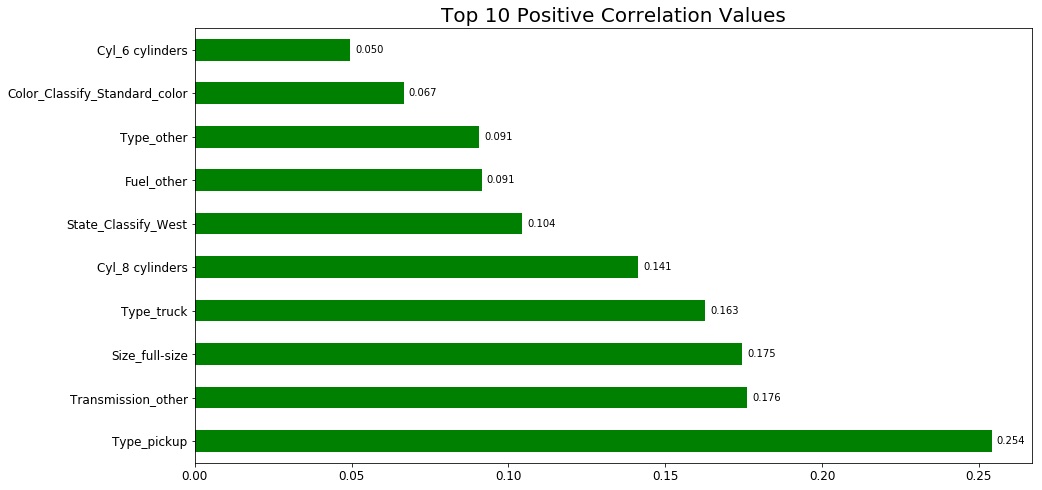

In [70]:
plt.figure(figsize=(15,8))
ax= corr['Price'].sort_values(ascending=False).head(10).plot(kind='barh', color="g", fontsize=12)
plt.grid(False)
plt.title('Top 10 Positive Correlation Values', fontsize=20)

# thanks to https://stackoverflow.com/questions/59213470/how-to-annotate-text-on-horizontal-seaborn-barplot
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    


In [71]:
corr['Price'].sort_values(ascending=False).tail(10)

State_Classify_Northeast   -0.072951
State_Classify_Midwest     -0.092113
Condition_fair             -0.123873
Size_mid-size              -0.127904
Cyl_4 cylinders            -0.188155
Drive_fwd                  -0.212411
Fuel_gas                   -0.232173
Type_sedan                 -0.259976
Odometer                   -0.477507
Age                        -0.596905
Name: Price, dtype: float64

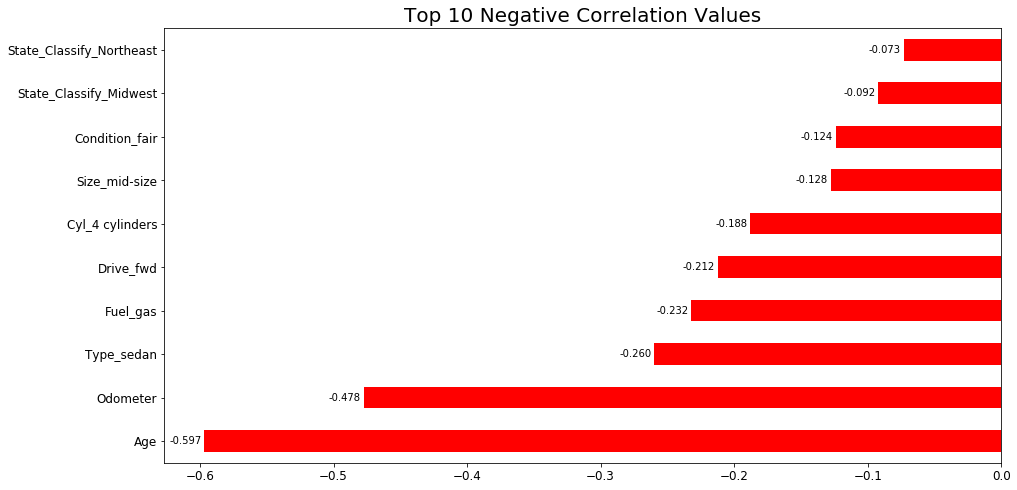

In [72]:
plt.figure(figsize=(15,8))
ax1 = corr['Price'].sort_values().head(10).plot(kind='barh', color="r", fontsize=12)
plt.grid(False)
plt.title('Top 10 Negative Correlation Values', fontsize=20)

for p in ax1.patches:
    ax1.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-35, 0), textcoords='offset points', ha="left", va="center")

#### **`Insight`**

`Correlation Values`

1. If cars’ type is Pick up or Truck, it will have positive relationship with the Price. Used cars which is Full size and has higher number of cylinders between 6-8 cylinders will likely have greater positive impact on the listing price
- Normally, Gas is commonly use fuel type and I will assume it may have neutral impact on the listing price, however, the result shows that it has a negative relationship with the listing price. The reason may relate to the rise of eco_cars in the market such as Hybrid and Electric cars as well as the rising price of gas.
- Front wheel drive's impact on the price is negative since it consumes more gas compare to other driving types.



# Create Prediction Model by OLS

### Age and Odometer are highly correlated to each other, So I will pick Odometer to make my prediction feature

In [73]:
numerical_feature.pop(0)

'ID'

In [74]:
numerical_feature.append('Age')

In [75]:
numerical_feature.pop(1)

'Year'

In [76]:
print(numerical_feature)
cars_true_dummies=pd.concat([cars_true,dummies],axis=1)

['Price', 'Odometer', 'Age']


In [77]:
cars_true[['Price', 'Age','Odometer','Year']].corr()

,Price,Age,Odometer,Year
Price,1.000000,-0.596905,-0.477507,0.596905
Age,-0.596905,1.000000,0.516333,-1.000000
Odometer,-0.477507,0.516333,1.000000,-0.516333
Year,0.596905,-1.000000,-0.516333,1.000000


In [80]:
from sklearn.model_selection import train_test_split

filt1 = ['Odometer']
feature = filt1 + dummies.columns.tolist()
y=cars_true_dummies['Price']
dependent_features = cars_true_dummies[feature]

X_train,X_test,y_train,y_test = train_test_split(dependent_features,y,random_state=1)

In [81]:
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 3.442e+04
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:17:23   Log-Likelihood:            -3.2839e+06
No. Observations:              323704   AIC:                         6.568e+06
Df Residuals:                  323656   BIC:                         6.568e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Odometer      

In [82]:
p=model.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p)*100/len(p)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)

97.92 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['Odometer', 'Condition_fair', 'Condition_good', 'Condition_like new', 'Condition_new', 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other', 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Transmission_manual', 'Transmission_other', 'Drive_fwd', 'Drive_rwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South', 'State_Classify_Southwest', 'Brand_Classify_Mid_tier_cars', 'Br

## Fit Test Set into the OLS Model

In [83]:
model_test=sm.OLS(y_test,X_test).fit()
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.159e+04
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:17:34   Log-Likelihood:            -1.0948e+06
No. Observations:              107902   AIC:                         2.190e+06
Df Residuals:                  107854   BIC:                         2.190e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Odometer      

In [84]:
p_test=model_test.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p)*100/len(p)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)

97.92 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['Odometer', 'Condition_fair', 'Condition_good', 'Condition_like new', 'Condition_new', 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other', 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Transmission_manual', 'Transmission_other', 'Drive_fwd', 'Drive_rwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South', 'State_Classify_Southwest', 'Brand_Classify_Mid_tier_cars', 'Br

## Discussion of Results ## 

Let's look at how they performed on train and test set on OLS Modeling. 

|Metric|On Training Set|On Test Set|
|------|:-:|:---------------------:|
|$R2$|0.836|0.838|


Overall, the models performed `FAIRLY GOOD` by looking at R_Square score on both set data. 



# Conclusion: 

### From the Craigslist Used Car dataset, we narrow down our dataset by cars' age, Odometer and Condition to fit our analysis goal. We found that 97% of variables are significant to our listing price. 

### The following are the top 5 variables that have `Positive` impact on our price:

1. Number of Cylinders
- Vehicle Size
- Vehicle Type
- Exterior Color
- New to Excellent condition

### The following are the top 5 variables that have `Negative` impact on our price:

1. Fair to Salvage condition
- Increasing Mileage
- Unclear Title Status
- Hatchback and Sedan 
- Location: used cars located in Midwest and Northeast 

### Since we want to increase our sales revenue by 10%, We can price our cars based above features and we can also take the following actions:
1. we can buy back the used cars from private parties from Northeast and Midwest regions since they both have reasonable average listing price compare other regions and we are able to resell them to other region such as Central since it has highest average price.
- We should utilize tiered pricing on different type of cars depend on its horsepower, transmission type and their condition since these elements have direct impact on the pricing when we put our cars in the market. We should avoid buy back any used cars in fair condition because they may increase in repairment cost.
- We can provide additional research services / remote sales (not limited to the local search ) to our customers to keep them updates what it is in the market with a little extra charges. 





In [86]:
cars_true.to_csv("cars.csv")